In [5]:
!pip install opencv-python requests python-dotenv image matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/8f/b8/1bf1012eee3059d150194d1fab148f553f3df42cf412e4e6656c772afad9/Pillow-10.0.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for django from https://files.pythonhosted.org/packages/7f/9e/fc6bab255ae10bc57fa2f65646eace3d5405fbb7f5678b90140052d1db0f/Django-4.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a5/d6/80258c2759bd34abe267b5d3bc6300f7105aa70181b99d531283f7e7c79e/contourpy-1.1.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https

In [6]:
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt
 
import uuid
import json
import time
import cv2
import requests
import os
import dotenv

In [7]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [8]:
def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [9]:
dotenv.load_dotenv()
api_url = os.getenv("api_url")
secret_key = os.getenv("secret_key")

In [10]:
path = 'test.jpeg'
files = [('file', open(path,'rb'))]

In [11]:
request_json = {'images': [{'format': 'jpeg',
                                'name': 'demo'
                               }],
                    'requestId': str(uuid.uuid4()),
                    'version': 'V2',
                    'timestamp': int(round(time.time() * 1000))
                   }
 
payload = {'message': json.dumps(request_json).encode('UTF-8')}
 
headers = {
  'X-OCR-SECRET': secret_key,
}
 
response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
result = response.json()

かぐや様は
ーファーストキッスは終わらない
告らせたい
12.17
sat
特別上映開始
kaguya.love
anime
kaguya
◎赤坂アカ/塩茶社·かぐや様は
せたい製作委員会


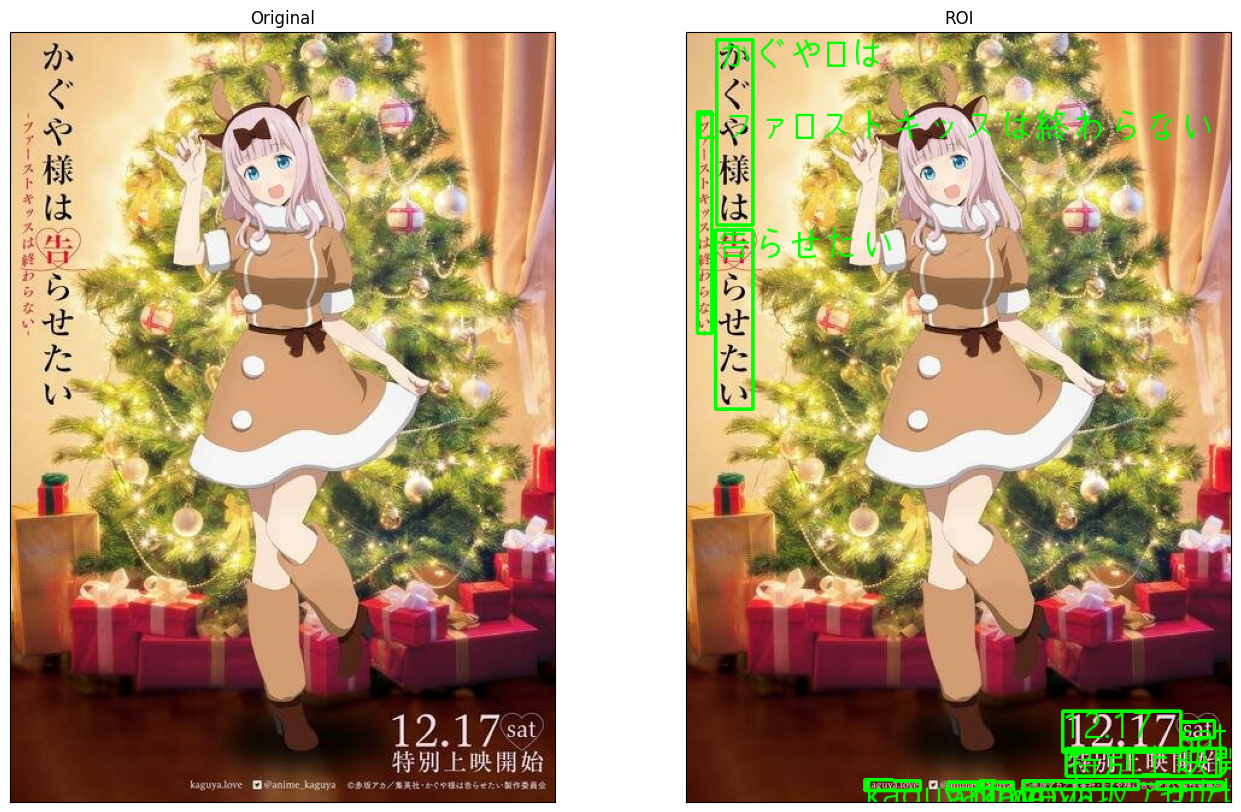

In [12]:
img = cv2.imread(path)
roi_img = img.copy()
 
for field in result['images'][0]['fields']:
    text = field['inferText']
    vertices_list = field['boundingPoly']['vertices']
    pts = [tuple(vertice.values()) for vertice in vertices_list]
    topLeft = [int(_) for _ in pts[0]]
    topRight = [int(_) for _ in pts[1]]
    bottomRight = [int(_) for _ in pts[2]]
    bottomLeft = [int(_) for _ in pts[3]]
 
    cv2.line(roi_img, topLeft, topRight, (0,255,0), 2)
    cv2.line(roi_img, topRight, bottomRight, (0,255,0), 2)
    cv2.line(roi_img, bottomRight, bottomLeft, (0,255,0), 2)
    cv2.line(roi_img, bottomLeft, topLeft, (0,255,0), 2)
    roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 10, font_size=30)
    
    print(text)
 
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))